<a href="https://colab.research.google.com/github/namnitha/Dissertation/blob/master/19-08/Visual_P300_(VPtaq).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install mne

     |████████████████████████████████| 6.6MB 2.9MB/s 


In [2]:
pip install neo

     |████████████████████████████████| 2.1MB 4.0MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 
  Created wheel for neo: filename=neo-0.8.0-cp36-none-any.whl size=558935 sha256=e2f575e1ca435b255487e5a485f7e78be2355c1e3e5a477b1b6a6d54bac5d282
  Stored in directory: /root/.cache/pip/wheels/28/35/f4/273432a8b9eb6c9182e666e9630cc92c221dabe81462606d9c
  Created wheel for quantities: filename=quantities-0.12.4-cp36-none-any.whl size=79167 sha256=3092c2d468c7cc55101f0b65de9bfe397c1fabb2f4f21f8885380704b1bc7425
  Stored in directory: /root/.cache/pip/wheels/2c/27/a5/62fb2a57d167d7b7164278de7399ba1504321c1d6c3a3802d5
Successfully built neo quantities


In [3]:
pip install BCI2kReader

In [4]:
import neo
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from BCI2kReader import BCI2kReader as b2k

In [82]:
data_1 = b2k.BCI2kReader('/content/VPtaqS001R01.dat')
data_2 = b2k.BCI2kReader('/content/VPtaqS001R02.dat')
data_3 = b2k.BCI2kReader('/content/VPtaqS001R03.dat')
data_4 = b2k.BCI2kReader('/content/VPtaqS001R04.dat')
data_5 = b2k.BCI2kReader('/content/VPtaqS001R05.dat')
data_6 = b2k.BCI2kReader('/content/VPtaqS001R06.dat')

In [6]:
signals = data_1.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_1 = data_1.signals

#reads all states as a dictionary
my_states_1 = data_1.states
my_states_1['Running']

#printing my_states
print('my_sytates 1 = ', my_states_1)

Shape of the Data Signals (68, 96260)
my_sytates 1 =  {'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[ 5509,  5509,  5509, ..., 11077, 11077, 11077]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[5, 5, 5, ..., 6, 6, 6]], dtype=int32), 'SelectedRow': array([[1, 1, 1, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[5, 5, 5, ..., 1, 1, 1]], dtype=int32), 'PhaseInSequence': array([[2, 2, 2, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[ 5478,  5478,  5478, ..., 11046, 11046, 11046]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96260
    Range : 0 ... 96259 =      0.000 ...   962.590 secs
Ready.
<RawArray | 68 x 96260 (962.6 s), ~50.1 MB, data loaded>


<ipython-input-7-2525885f199b>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


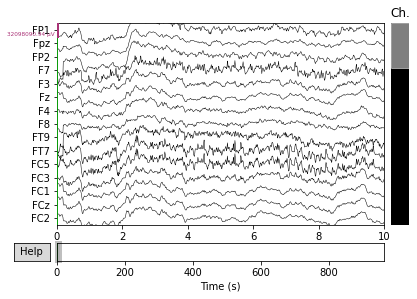

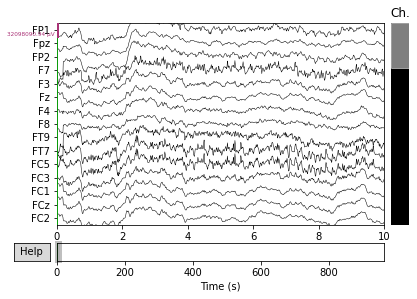

In [7]:
#creating MNE datastructures
#Creating Raw objects and info
info_1 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_1)
raw_1 = mne.io.RawArray(my_signals_1, info_1)
print(raw_1)

#Plot the raw data
raw_1.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [8]:
#Extracting the attended and non-attended stimuli

st = my_states_1['StimulusType'][0]
sc = my_states_1['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[ 860    0    1]
 [1580    0    1]
 [2300    0    1]
 [2900    0    1]
 [3260    0    1]]
Found 750 events, first five:
[[  860     0     1]
 [ 1580     0     1]
 [ 2300     0     1]
 ...
 [94500     0     2]
 [94620     0     2]
 [94980     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-9-0e3a45580084>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


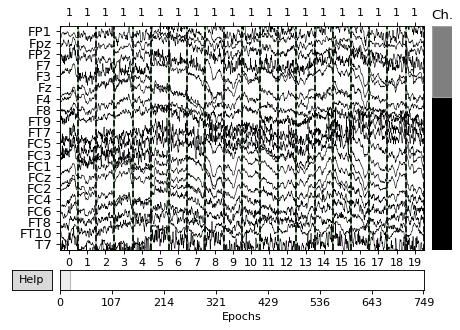

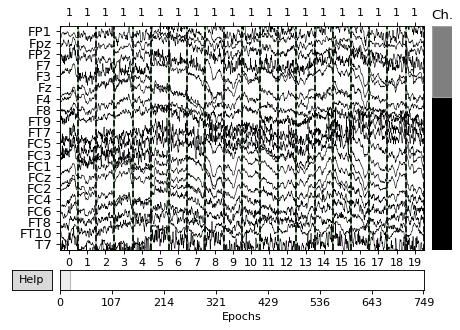

In [9]:
##Creating the Epochs Data Structure

#for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_1.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_1 = mne.Epochs(raw_1, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_1.plot(scalings='auto', show=True, block=True)

#-----------------------Dataset 2 ------------------------------


In [10]:
signals_2 = data_2.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_2 = data_2.signals

#reads all states as a dictionary
my_states_2= data_2.states
my_states_2['Running']

#printing my_states
print('my_sytates 2 = ', my_states_2)

Shape of the Data Signals (68, 96260)
my_sytates 2 =  {'SourceTime': array([[52074, 52074, 52074, ..., 47910, 47910, 47910]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32), 'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[ 0,  0,  0, ..., 19, 19, 19]], dtype=int32), 'SelectedRow': array([[0, 0, 0, ..., 4, 4, 4]], dtype=int32), 'SelectedColumn': array([[0, 0, 0, ..., 4, 4, 4]], dtype=int32), 'PhaseInSequence': array([[0, 0, 0, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[52060, 52060, 52060, ..., 47884, 47884, 47884]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96240
    Range : 0 ... 96239 =      0.000 ...   962.390 secs
Ready.
<RawArray | 68 x 96240 (962.4 s), ~50.1 MB, data loaded>


<ipython-input-11-aa89fc6e69d3>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


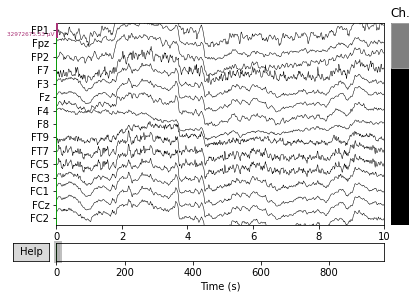

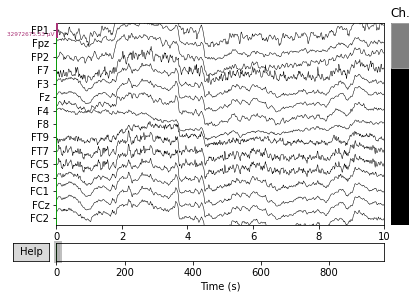

In [11]:
##Creating MNE datastructure

#Creating Raw objects and info
info_2 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_2)
raw_2 = mne.io.RawArray(my_signals_2, info_2)
print(raw_2)

#Plot the raw data
raw_2.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [28]:
##Extracting the attended and non-attended stimuli

st = my_states_2['StimulusType'][0]
sc = my_states_2['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[1200    0    1]
 [1440    0    1]
 [2520    0    1]
 [3000    0    1]
 [3120    0    1]]
Found 750 events, first five:
[[ 1200     0     1]
 [ 1440     0     1]
 [ 2520     0     1]
 ...
 [94480     0     2]
 [94600     0     2]
 [94960     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-25-ed0a1f1c718f>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


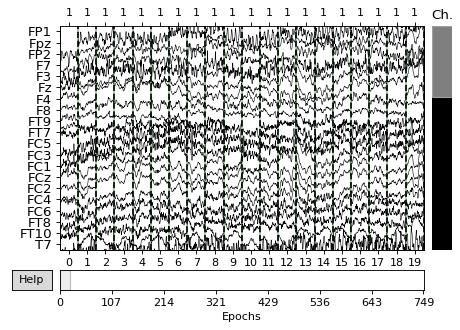

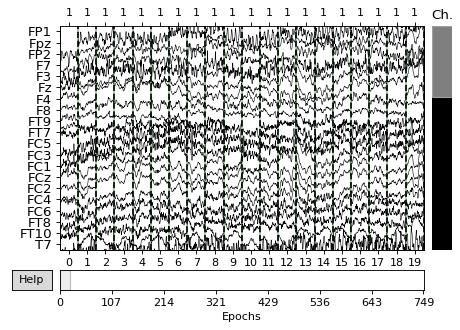

In [25]:
##Creating Epochs Datastructure

#for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_2.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_2 = mne.Epochs(raw_2, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_2.plot(scalings='auto', show=True, block=True)

#----------------------------Dataset 3---------------------------

In [85]:
signals_3 = data_3.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_3 = data_3.signals

#reads all states as a dictionary
my_states_3 = data_3.states
my_states_3['Running']

#printing my_states
print('my_sytates 3 = ', my_states_3)

Shape of the Data Signals (68, 96260)
my_sytates 3 =  {'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[64746, 64746, 64746, ..., 60574, 60574, 60574]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[0, 0, 0, ..., 9, 9, 9]], dtype=int32), 'SelectedRow': array([[0, 0, 0, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[0, 0, 0, ..., 4, 4, 4]], dtype=int32), 'PhaseInSequence': array([[0, 0, 0, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[64742, 64742, 64742, ..., 60536, 60536, 60536]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96240
    Range : 0 ... 96239 =      0.000 ...   962.390 secs
Ready.
<RawArray | 68 x 96240 (962.4 s), ~50.1 MB, data loaded>


<ipython-input-15-47d4ea0214cb>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


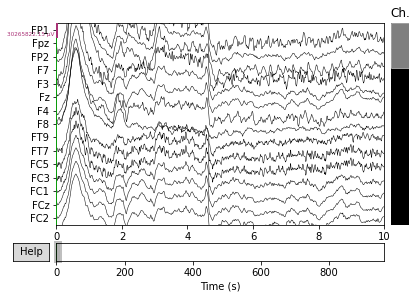

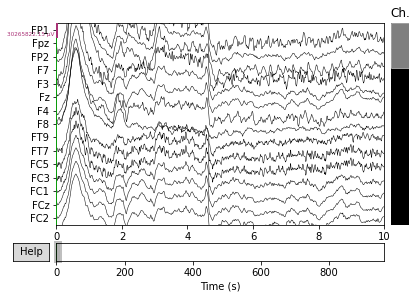

In [15]:
## Creating MNE datastructures

#Creating Raw objects and info
info_3 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_3)
raw_3 = mne.io.RawArray(my_signals_3, info_3)
print(raw_3)

#Plot the raw data
raw_3.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [29]:
##Extracting the attended and non-attended stimuli

st = my_states_3['StimulusType'][0]
sc = my_states_3['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[ 720    0    1]
 [1440    0    1]
 [2280    0    1]
 [2640    0    1]
 [3120    0    1]]
Found 750 events, first five:
[[  720     0     1]
 [ 1440     0     1]
 [ 2280     0     1]
 ...
 [94480     0     2]
 [94720     0     2]
 [94840     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-24-937bae848e20>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


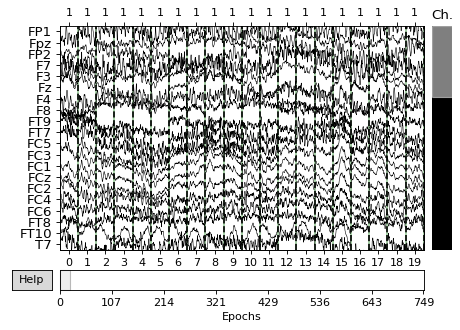

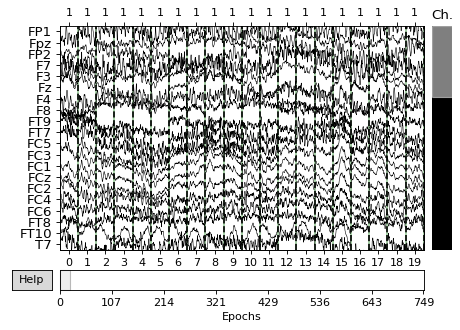

In [24]:
##Creating Epochs Datastructure
#for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_3.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_3 = mne.Epochs(raw_3, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_3.plot(scalings='auto', show=True, block=True)

#----------------------------Dataset 4-----------------------------------

In [86]:
signals_4 = data_4.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_4 = data_4.signals

#reads all states as a dictionary
my_states_4 = data_4.states
my_states_4['Running']

#printing my_states
print('my_sytates 4 = ', my_states_4)

Shape of the Data Signals (68, 96260)
my_sytates 4 =  {'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[32711, 32711, 32711, ..., 28546, 28546, 28546]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[0, 0, 0, ..., 5, 5, 5]], dtype=int32), 'SelectedRow': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'SelectedColumn': array([[0, 0, 0, ..., 5, 5, 5]], dtype=int32), 'PhaseInSequence': array([[0, 0, 0, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[32702, 32702, 32702, ..., 28514, 28514, 28514]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96240
    Range : 0 ... 96239 =      0.000 ...   962.390 secs
Ready.


<ipython-input-87-914afe95f761>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


<RawArray | 68 x 96240 (962.4 s), ~50.1 MB, data loaded>


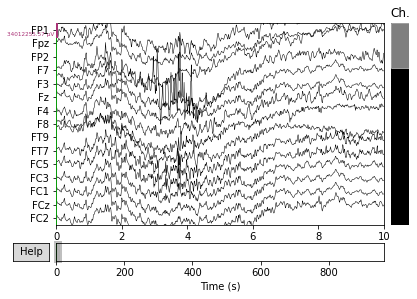

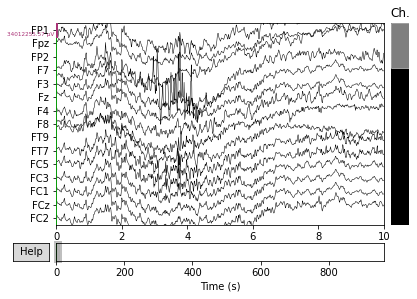

In [87]:
##Creating MNE datastructures
#Creating Raw objects and info
info_4 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_4)
raw_4 = mne.io.RawArray(my_signals_4, info_4)
print(raw_4)

#Plot the raw data
raw_4.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [88]:
##Extracting the attended and non-attended stimuli
st = my_states_4['StimulusType'][0]
sc = my_states_4['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[ 720    0    1]
 [1560    0    1]
 [2640    0    1]
 [2880    0    1]
 [3960    0    1]]
Found 750 events, first five:
[[  720     0     1]
 [ 1560     0     1]
 [ 2640     0     1]
 ...
 [94600     0     2]
 [94720     0     2]
 [94840     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-89-f69fd8873bd4>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


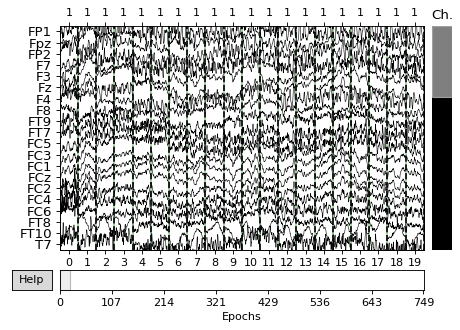

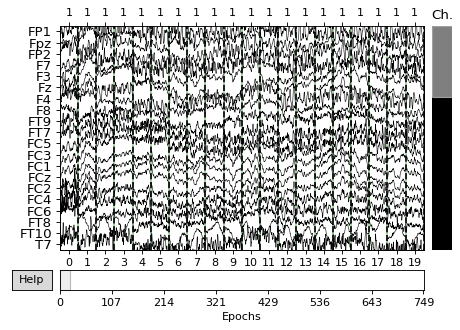

In [89]:
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_4.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_4 = mne.Epochs(raw_4, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_4.plot(scalings='auto', show=True, block=True)

#---------------------Dataset 5---------------------

In [90]:
signals_5 = data_5.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_5 = data_5.signals

#reads all states as a dictionary
my_states_5 = data_5.states
my_states_5['Running']

#printing my_states
print('my_sytates 5 = ', my_states_5)

Shape of the Data Signals (68, 96260)
my_sytates 5 =  {'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[19500, 19500, 19500, ..., 15336, 15336, 15336]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[0, 0, 0, ..., 9, 9, 9]], dtype=int32), 'SelectedRow': array([[0, 0, 0, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[0, 0, 0, ..., 4, 4, 4]], dtype=int32), 'PhaseInSequence': array([[0, 0, 0, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[19497, 19497, 19497, ..., 15297, 15297, 15297]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96240
    Range : 0 ... 96239 =      0.000 ...   962.390 secs
Ready.


<ipython-input-91-e348ed2c9f26>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


<RawArray | 68 x 96240 (962.4 s), ~50.1 MB, data loaded>


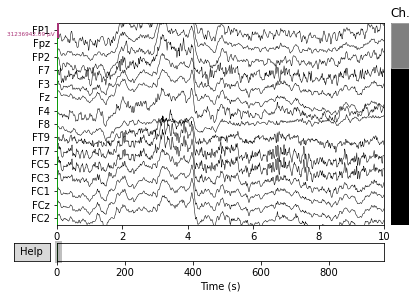

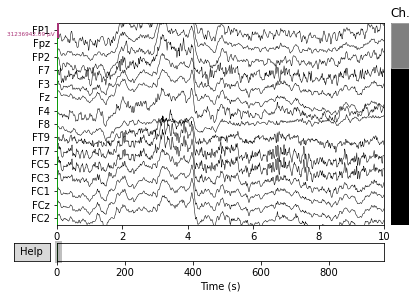

In [91]:
#creating MNE datastructures
#Creating Raw objects and info
info_5 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_5)
raw_5 = mne.io.RawArray(my_signals_5, info_5)
print(raw_5)

#Plot the raw data
raw_5.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)


In [92]:
st = my_states_5['StimulusType'][0]
sc = my_states_5['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[ 720    0    1]
 [ 840    0    1]
 [1920    0    1]
 [2400    0    1]
 [3240    0    1]]
Found 750 events, first five:
[[  720     0     1]
 [  840     0     1]
 [ 1920     0     1]
 ...
 [94480     0     2]
 [94600     0     2]
 [94720     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-93-0146cc775996>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


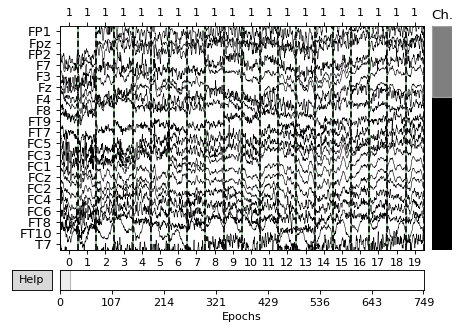

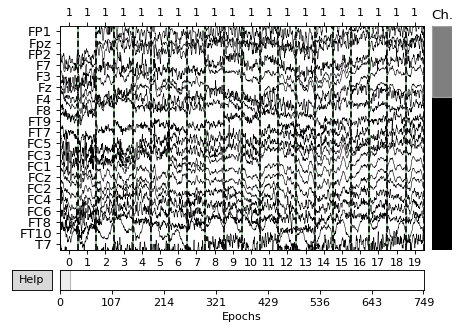

In [93]:
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_5.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_5 = mne.Epochs(raw_5, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_5.plot(scalings='auto', show=True, block=True)

#-------------------------Dataset6----------------------

In [94]:
signals_6 = data_6.signals
print('Shape of the Data Signals', signals.shape)

#reads the whole file and stores it in a numpy matrix channels
my_signals_6 = data_6.signals

#reads all states as a dictionary
my_states_6 = data_6.states
my_states_6['Running']

#printing my_states
print('my_sytates 6 = ', my_states_6)

Shape of the Data Signals (68, 96260)
my_sytates 6 =  {'SourceTime': array([[56658, 56658, 56658, ..., 52489, 52489, 52489]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32), 'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[0, 0, 0, ..., 5, 5, 5]], dtype=int32), 'SelectedRow': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'SelectedColumn': array([[0, 0, 0, ..., 5, 5, 5]], dtype=int32), 'PhaseInSequence': array([[0, 0, 0, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[56655, 56655, 56655, ..., 52457, 52457, 52457]], dtype=int32)}


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96240
    Range : 0 ... 96239 =      0.000 ...   962.390 secs
Ready.


<ipython-input-95-bec35d40eed0>:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


<RawArray | 68 x 96240 (962.4 s), ~50.1 MB, data loaded>


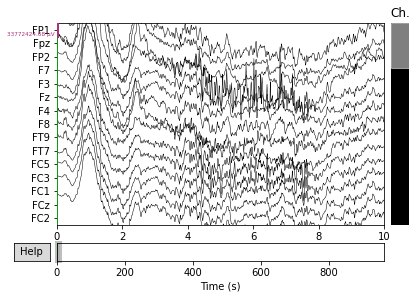

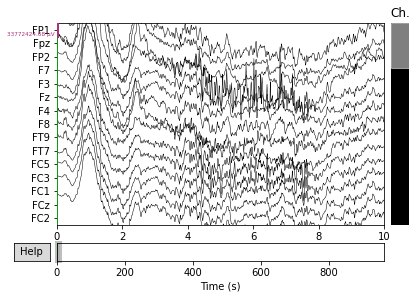

In [95]:
#creating MNE datastructures
#Creating Raw objects and info
info_6 = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info_6)
raw_6 = mne.io.RawArray(my_signals_6, info_6)
print(raw_6)

#Plot the raw data
raw_6.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)


In [96]:
st = my_states_6['StimulusType'][0]
sc = my_states_6['StimulusCode'][0]
LS = 0  #last state
isFirst = True
#---------------------------Attended-------------------------
#Targets
for i in range(len(st)):    
    if(LS != st[i] and st[i] == 1):
        if isFirst:
            events = np.array([i, 0, 1])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, 1])))
    LS = st[i] 
print('Found %s events, first five:' % len(events))
print(events[:5])

#---------------------------Non attended-------------------------
#StimulusType and code
LS = 0  #last state
for i in range(len(sc)):  
    if(LS != sc[i] and sc[i] != 0 and st[i] == 0):
      events = np.vstack((events, np.array([i, 0, 2])))
    LS = sc[i]
print('Found %s events, first five:' % len(events))
print(events[:-5])

Found 150 events, first five:
[[1560    0    1]
 [1800    0    1]
 [2040    0    1]
 [2880    0    1]
 [3120    0    1]]
Found 750 events, first five:
[[ 1560     0     1]
 [ 1800     0     1]
 [ 2040     0     1]
 ...
 [94480     0     2]
 [94600     0     2]
 [94720     0     2]]


750 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 750 events and 100 original time points ...


<ipython-input-97-e542cfee104b>:9: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  tmax=tmax, baseline=None, verbose=True, picks = picks )


0 bad epochs dropped
Loading data for 750 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


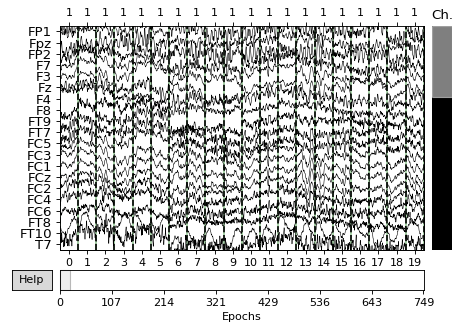

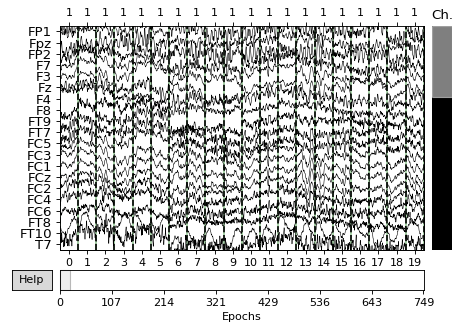

In [97]:
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
picks = mne.pick_types(raw_6.info, meg=False, eeg=True, stim=False, eog=False,
                   exclude='bads')
epochs_6 = mne.Epochs(raw_6, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True, picks = picks )

#Plotting Epochs
epochs_6.plot(scalings='auto', show=True, block=True)

#Concatenating all Epochs structures

In [98]:
#Concatenating all Epochs structures
standard_epochs = mne.concatenate_epochs(epochs_list = [epochs_1, epochs_2, epochs_3, epochs_4, epochs_5, epochs_6])

Loading data for 750 events and 100 original time points ...
Loading data for 750 events and 100 original time points ...
Loading data for 750 events and 100 original time points ...
Loading data for 750 events and 100 original time points ...
Loading data for 750 events and 100 original time points ...
Loading data for 750 events and 100 original time points ...
4500 matching events found
No baseline correction applied
Not setting metadata
0 bad epochs dropped


<ipython-input-98-3c8c2ee25d7d>:2: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  standard_epochs = mne.concatenate_epochs(epochs_list = [epochs_1, epochs_2, epochs_3, epochs_4, epochs_5, epochs_6])


#Classifying the Epochs

In [99]:
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.svm import SVC


from mne.preprocessing import Xdawn
from mne.decoding import Vectorizer

In [103]:
# Create classification pipeline
n_filter = 3

event_id = {'Attended': 1, 'Non-Attended': 2}

clf = make_pipeline(Xdawn(),
                    Vectorizer(),
                    MinMaxScaler(),
                    #SVC(gamma=2, C=1) )
                    #LinearDiscriminantAnalysis() )
                    LogisticRegression(penalty='l1', solver='liblinear',
                                      multi_class='auto'))

# Get the labels 
labels = standard_epochs.events[:, -1]

# Cross validator
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Do cross-validation
preds = np.empty(len(labels))
for train, test in cv.split(standard_epochs, labels):
    y_train, y_test = labels[train], labels[test]

    clf.fit(standard_epochs[train], y_train)
    preds[test] = clf.predict(standard_epochs[test])

# Classification report
target_names = ['attended', 'non-attended']
report = classification_report(labels, preds, target_names=target_names)
print(report)

# Normalized confusion matrix
cm = confusion_matrix(labels, preds)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]


Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank='full'
    EEG: rank 63 from info
Reducing data rank from 63 -> 63
Estimating covariance 

In [ ]:
""" 
n_splits = 20

original logistic regression
              precision    recall  f1-score   support

    attended       0.59      0.14      0.23       450
non-attended       0.82      0.97      0.89      1800

    accuracy                           0.81      2250
   macro avg       0.71      0.56      0.56      2250
weighted avg       0.77      0.81      0.76      2250

[[  65  385]
 [  45 1755]]
Accuracy = 0.8088888888888889

with LDA
              precision    recall  f1-score   support

    attended       0.37      0.27      0.31       450
non-attended       0.83      0.89      0.86      1800

    accuracy                           0.76      2250
   macro avg       0.60      0.58      0.58      2250
weighted avg       0.74      0.76      0.75      2250
[[ 121  329]
 [ 206 1594]]
Accuracy = 0.7622222222222222

with SVC
              precision    recall  f1-score   support

    attended       0.00      0.00      0.00       450
non-attended       0.80      1.00      0.89      1800

    accuracy                           0.80      2250
   macro avg       0.40      0.50      0.44      2250
weighted avg       0.64      0.80      0.71      2250

[[   0  450]
 [   0 1800]]
 Accuracy = 0.8

In [104]:
from sklearn.metrics import accuracy_score
cm = confusion_matrix(labels, preds)
print(cm)
print('Accuracy = ' + str(accuracy_score(labels, preds)))

[[ 266  634]
 [ 129 3471]]
Accuracy = 0.8304444444444444


[Text(25.775000000000063, 0.5, 'True label'),
 Text(0.5, -29.889163889605747, 'Predicted label')]

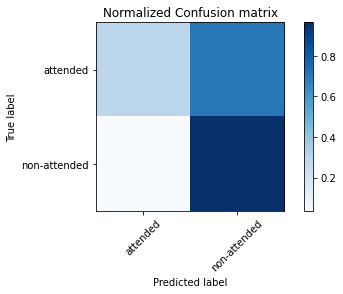

In [105]:
# Plot confusion matrix
fig, ax = plt.subplots(1)
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(title='Normalized Confusion matrix')
fig.colorbar(im)
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
fig.tight_layout()
ax.set(ylabel='True label', xlabel='Predicted label')